In [1]:
!git --version



git version 2.34.1


In [ ]:
!git config --global user.name "mitil31"
!git config --global user.email "mitra.sedigh.dianaty.1418@gmail.com"


In [2]:
!git clone https://github.com/mitil31/num-mnist-model.git

Cloning into 'num-mnist-model'...


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
mnist = keras.datasets.mnist

In [5]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_features.shape

(60000, 28, 28)

In [6]:
test_features.shape

(10000, 28, 28)

0


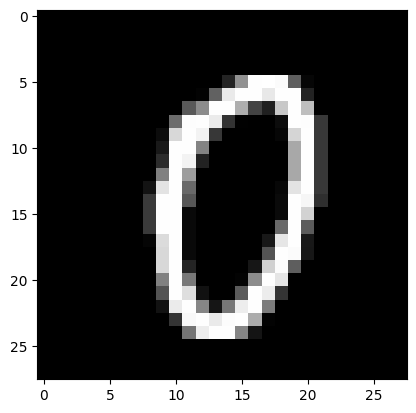

In [22]:
idx = 1000
img = train_features[idx]

print(train_labels[idx])

plt.gray()
plt.imshow(img)

#Preproccessing

In [16]:
np.min(img), np.max(img)

(0.0, 1.0)

In [17]:
train_features = train_features/255.0
test_features = test_features/255.0

#Model definition

In [18]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units= 128, activation= 'relu'))
model.add(keras.layers.Dense(units= 128, activation= 'relu'))
model.add(keras.layers.Dense(units= 10, activation= 'softmax'))

In [19]:
model.compile(optimizer= tf.optimizers.Adam(), loss= tf.losses.sparse_categorical_crossentropy, metrics= ['accuracy'])

In [20]:
model.build(input_shape= (None, 28, 28))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist= model.fit(train_features, train_labels, epochs= 500, batch_size= 256, validation_data= (test_features, test_labels))

Epoch 1/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3231 - loss: 2.0326 - val_accuracy: 0.7448 - val_loss: 0.8558
Epoch 2/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7741 - loss: 0.7551 - val_accuracy: 0.8456 - val_loss: 0.5340
Epoch 3/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.5053 - val_accuracy: 0.8759 - val_loss: 0.4216
Epoch 4/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.4159 - val_accuracy: 0.8922 - val_loss: 0.3740
Epoch 5/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8913 - loss: 0.3741 - val_accuracy: 0.8991 - val_loss: 0.3470
Epoch 6/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9000 - loss: 0.3453 - val_accuracy: 0.9050 - val_loss: 0.3270
Epoch 7/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9021 - loss: 0.3338 - val_accuracy: 0.9087 - val_loss: 0.3141
Epoch 8/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9096 - loss: 0.3155 - val_accu

In [23]:
model.evaluate(test_features, test_labels)

idx= 100
img= test_features[idx]
print(test_labels[idx])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.2794
6


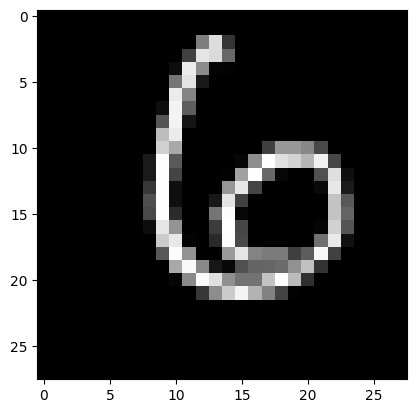

In [24]:
plt.gray()
plt.imshow(img)

In [38]:
test_data_reshaped= test_data.reshape(1, 28, 28)
model.predict(test_data_reshaped)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[2.1509547e-21, 8.1005700e-22, 9.8998250e-18, 6.0860187e-26,
        3.2972660e-20, 1.3880012e-13, 1.0000000e+00, 1.5473472e-31,
        1.2857586e-18, 2.7913408e-33]], dtype=float32)

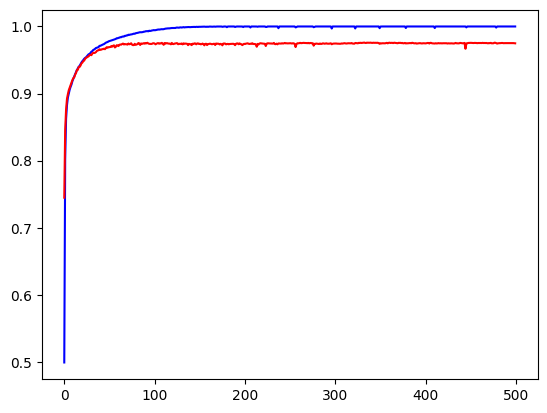

In [39]:
acc= hist.history['accuracy']
val_acc= hist.history['val_accuracy']

plt.plot(acc, color= 'blue')
plt.plot(val_acc, color= 'red')

In [40]:
!git add .


fatal: not a git repository (or any of the parent directories): .git


In [41]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [1]:
!git remote add origin https://github.com/mitil31/num-mnist-model.git


fatal: not a git repository (or any of the parent directories): .git


In [2]:
!pwd


/content


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [13]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/.git/


In [16]:
!git remote add origin https://github.com/mitil31/num-mnist-model.git


error: remote origin already exists.


In [18]:
!git remote remove origin


error: No such remote: 'origin'


In [21]:
!git remote -v


In [36]:
!git remote add origin https://github.com/mitil31/num-mnist-model.git


error: remote origin already exists.


In [24]:
!git remote -v


origin	https://github.com/mitil31/num-mnist-model.git (fetch)
origin	https://github.com/mitil31/num-mnist-model.git (push)


In [25]:
!git add .


In [26]:
!git commit -m "Initial commit"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@8a50163a6739.(none)')


In [27]:
!git config --global user.name "mitil31"
!git config --global user.email "mitra.sedigh.dianaty.1418@gmail.com"

In [28]:
!git config --list


filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.name=mitil31
user.email=mitra.sedigh.dianaty.1418@gmail.com
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/mitil31/num-mnist-model.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*


In [29]:
!git add .


In [30]:
!git commit -m "Initial commit"


[master (root-commit) f9be407] Initial commit
 7 files changed, 7 insertions(+)
 create mode 100644 01_Python_Reza_Shokrzad_Basics.ipynb
 create mode 100644 Untitled0.ipynb
 create mode 100644 Untitled1.ipynb
 create mode 100644 Untitled2.ipynb
 create mode 100644 Untitled3.ipynb
 create mode 100644 Untitled4.ipynb
 create mode 100644 num-mnist-model.ipynb


In [31]:
!git push -u origin main


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/mitil31/num-mnist-model.git'


In [32]:
!git branch


* master


In [33]:
!git push -u origin master


fatal: could not read Username for 'https://github.com': No such device or address


In [34]:
!git branch -M main


In [35]:
!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address


In [37]:
!git remote add origin https://github.com/mitil31/num-mnist-model.git

error: remote origin already exists.


In [38]:
!ls ~/.ssh


ls: cannot access '/root/.ssh': No such file or directory


In [39]:
!ssh-keygen -t rsa -b 4096 -C "mitra.sedigh.dianaty.1418@gmail.com"


Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): ^C


In [41]:
!cat ~/.ssh/id_rsa.pub


cat: /root/.ssh/id_rsa.pub: No such file or directory


In [42]:
!ssh-keygen -t rsa -b 4096 -C "your_email@example.com"



Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): ^C


In [43]:
!cat ~/.ssh/id_rsa.pub


cat: /root/.ssh/id_rsa.pub: No such file or directory


In [44]:
!mkdir -p ~/.ssh


In [45]:
!ssh-keygen -t rsa -b 4096 -C "mitra.sedigh.dianaty.1418@gmail.com" -f ~/.ssh/id_rsa -N ""


Generating public/private rsa key pair.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:KlOuh8RUIyZBer9f1C3EPxmhr574maUdY02+d8E17b8 mitra.sedigh.dianaty.1418@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
| .o.        .    |
| .. o o  . . .   |
|. .o o .  + .   .|
| . ..    o + o .o|
|   o. . S o * o.o|
|    o+ o   o = o.|
|   .+.o . . = o o|
|    .=.. o O o .+|
|    ... ..B . .Eo|
+----[SHA256]-----+


In [46]:
!ls ~/.ssh


id_rsa	id_rsa.pub


In [47]:
!cat ~/.ssh/id_rsa.pub


ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDRK8+sj2Yke2SkPfzvU7NqJnZjxUT2pw4OvrNb1ulZMzs92mC1ggRidfG3PBMihFzy0sYvJjbabI8LIsbUifABcqO0IEUkmpys8FmU5++x87pFlBLhODwhvjoedwdc3ZwhwazZxKYaJspi7Vi+50FW/eeiWRp02DZW2ERdDHyyRTW2fprLdUREnKLL7ulS7x0O0fPmOBuxkUNOwW00d8rCg9gu8lOJf/RrQo62o2VFS+5aajefxfEgNZoo4IXPwmSBhTQnRBjyiY5WKNK8ThJ1MY/FQMvOIY/B0cEoKlGHhAdmtWsfmOwCBPhXYu8HFjqB6aWqCW8dVgZ7gPwBp9AAdhccNmBMAqBc0voNY5+/6dcKg5EL6d5DyLUd1H+xurOf2OgtD+8G+gur0CQrLJ0nYfgOvbtebM1BogAO/FXnZrY+6YaZTj4T+0PnwVayTuyGjT1mMOgaZTGD7veqkTauQp5QyMoQF+Sea+oTlw5TQztvsqoDJUygZYGnf3KD7XcsSIeuR0qDLNEvbm7KL2HCHoA/qlplH9h1Twf5xa9n7Q6egyUhkuxs5iiTur0YDA7aL+eMtyvqfkWnk1zJuvaqLzxSuXPIGlTFtFdWrG4aZZmVGRbiEZ6+5syR40lnR4K6vETjgiEG8LRGtrwyxOoO8ChbJyeevt5sQF+pYdht4w== mitra.sedigh.dianaty.1418@gmail.com


In [48]:
!ssh -T git@github.com


Host key verification failed.


In [49]:
!ls ~/.ssh/


id_rsa	id_rsa.pub


In [50]:
!rm -f ~/.ssh/known_hosts


In [51]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts


# github.com:22 SSH-2.0-ad34f3baf


In [52]:
!ssh -T git@github.com


Hi mitil31! You've successfully authenticated, but GitHub does not provide shell access.


In [53]:
!git add .


In [54]:
!git commit -m "First commit via SSH"


[main c7860cd] First commit via SSH
 1 file changed, 1 insertion(+), 1 deletion(-)


In [55]:
!git status


On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   num-mnist-model.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
